In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
import re
from matplotlib import rcParams
from sklearn import linear_model
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 10,10
rcParams['axes.linewidth'] = 4.0
rcParams['savefig.dpi'] = 500
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [3]:
def rmse(pred, tar):
    return np.sqrt(((pred - tar) ** 2).mean())

def convertAffinity(x):
    return 8.314*300/1000/4.184*np.log(x/1000000)

# Single Linear Regression

In [4]:
group="Forster"
file=group+".xls"
dF=pd.read_excel(file, header=0)
dF.columns = ["Compound", "IC50"]

dF['Exp dG'] = dF['IC50'].apply(convertAffinity)

dF['Conf1 dG']=''
dG_list=[]
for k in range(16):
    tmp = dF['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf1/poses/mol2/Forster/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dF['Conf1 dG'] = dG_list
dF['Conf1 dG'] = pd.to_numeric(dF['Conf1 dG'])

dF['Conf2 dG']=''
dG_list2=[]
for k in range(16):
    tmp = dF['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf2/poses/mol2/Forster/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total2 = line.split()
            dG_list2.append(dG_total2[2])
dF['Conf2 dG'] = dG_list2
dF['Conf2 dG'] = pd.to_numeric(dF['Conf2 dG'])
dF['Calc dG'] = dF[['Conf1 dG','Conf2 dG']].min(axis=1)

In [5]:
group="Benito"
file=group+".xls"
dB=pd.read_excel(file, header=0)
dB.columns = ["Compound", "pIC50", "IC50"]

dB['Exp dG'] = dB['IC50'].apply(convertAffinity)

dB['Conf1 dG']=''
dG_list=[]
for k in range(21):
    tmp = dB['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf1/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dB['Conf1 dG'] = dG_list
dB['Conf1 dG'] = pd.to_numeric(dB['Conf1 dG'])

dB['Conf2 dG']=''
dG_list=[]
for k in range(21):
    tmp = dB['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf2/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dB['Conf2 dG'] = dG_list
dB['Conf2 dG'] = pd.to_numeric(dB['Conf2 dG'])
dB['Calc dG'] = dB[['Conf1 dG','Conf2 dG']].min(axis=1)
dB.drop(["pIC50"], axis=1, inplace = True)

In [6]:
group="Helal"
file=group+".xls"
dH=pd.read_excel(file, header=0)
dH.columns = ["Compound", "IC50"]

dH['Exp dG'] = dH['IC50'].apply(convertAffinity)

dH['Conf1 dG']=''
dG_list=[]
for k in range(29):
    tmp = dH['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf1/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dH['Conf1 dG'] = dG_list
dH['Conf1 dG'] = pd.to_numeric(dH['Conf1 dG'])

dH['Conf2 dG']=''
dG_list=[]
for k in range(29):
    tmp = dH['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf2/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dH['Conf2 dG'] = dG_list
dH['Conf2 dG'] = pd.to_numeric(dH['Conf2 dG'])
dH['Calc dG'] = dH[['Conf1 dG','Conf2 dG']].min(axis=1)

In [7]:
group="Mikami"
file=group+".xls"
dM=pd.read_excel(file, header=0)
dM.columns = ["Compound", "IC50"]

dM['Exp dG'] = dM['IC50'].apply(convertAffinity)

dM['Conf1 dG']=''
dG_list=[]
for k in range(38):
    tmp = dM['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf1/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dM['Conf1 dG'] = dG_list
dM['Conf1 dG'] = pd.to_numeric(dM['Conf1 dG'])

dM['Conf2 dG']=''
dG_list=[]
for k in range(38):
    tmp = dM['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf2/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dM['Conf2 dG'] = dG_list
dM['Conf2 dG'] = pd.to_numeric(dM['Conf2 dG'])
dM['Calc dG'] = dM[['Conf1 dG','Conf2 dG']].min(axis=1)

In [8]:
group="Qiu"
file=group+".xls"
dQ=pd.read_excel(file, header=0)
dQ.columns = ["Compound", "IC50"]

dQ['Exp dG'] = dQ['IC50'].apply(convertAffinity)

dQ['Conf1 dG']=''
dQ['Conf2 dG']=''
dG_list=[]
for k in range(9):
    tmp = dQ['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf1/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dQ['Conf1 dG'] = dG_list
dQ['Conf1 dG'] = pd.to_numeric(dQ['Conf1 dG'])

dG_list=[]
for k in range(9):
    tmp = dQ['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf2/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dQ['Conf2 dG'] = dG_list
dQ['Conf2 dG'] = pd.to_numeric(dQ['Conf2 dG'])
dQ['Calc dG'] = dQ[['Conf1 dG','Conf2 dG']].min(axis=1)

In [9]:
group="Stachel"
file=group+".xls"
dS=pd.read_excel(file, header=0)
dS.columns = ["Compound", "IC50"]

dS['Exp dG'] = dS['IC50'].apply(convertAffinity)

dS['Conf1 dG']=''
dS['Conf2 dG']=''
dG_list=[]
for k in range(6):
    tmp = dS['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf1/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dS['Conf1 dG'] = dG_list
dS['Conf1 dG'] = pd.to_numeric(dS['Conf1 dG'])

dG_list=[]
for k in range(6):
    tmp = dS['Compound'][k]
    cmpd = str(tmp)
    file="/home/chuck/u1/pde2/glide-pde-conf2/poses/mol2/"+group+"/amber/"+tmp+"/pbsa/Results.dat"
    readFile = open(file, "r")
    for line in readFile:
        line = line.strip() # strip end-on-line
        if re.match(r"DELTA TOTAL", line):
            dG_total = line.split()
            dG_list.append(dG_total[2])
dS['Conf2 dG'] = dG_list
dS['Conf2 dG'] = pd.to_numeric(dS['Conf2 dG'])
dS['Calc dG'] = dS[['Conf1 dG','Conf2 dG']].min(axis=1)

In [10]:
bigdata = pd.concat([dF, dB, dH, dM, dQ, dS], ignore_index=True, sort=False)
#dF, dB, dH, dM, dQ, dS
#bigdata
#bigdata[bigdata[['Conf1 dG','Conf2 dG']].duplicated()]
#bigdata[bigdata.duplicated()]

In [11]:
X = sm.add_constant(bigdata["Calc dG"])
Y = bigdata["Exp dG"]

results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())

regr = linear_model.LinearRegression()
regr.fit(X,Y)
b = regr.intercept_
m = regr.coef_[1]
print('Y-Intercept: ', regr.intercept_)
print('Slope: ', regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                 Exp dG   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     15.22
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           0.000160
Time:                        11:36:21   Log-Likelihood:                -221.57
No. Observations:                 119   AIC:                             447.1
Df Residuals:                     117   BIC:                             452.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1066      0.894     -2.357      0.0

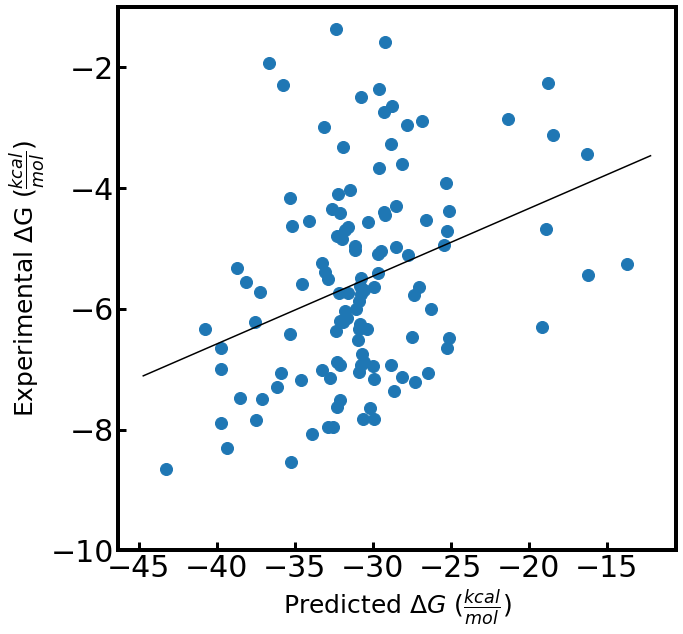

In [12]:
X=bigdata["Calc dG"]
Y=bigdata["Exp dG"]

# Scatter plot
plt.scatter(X, Y, s=12**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel(r'Predicted $\Delta G \ (\frac{kcal}{mol})$', fontsize=25)
plt.ylabel(r'Experimental $\Delta$G $(\frac{kcal}{mol})$', fontsize=25)
plt.xticks(fontsize=30)
plt.yticks((np.arange(-2, -12, step=-2)), fontsize=30)
#plt.yticks(fontsize=30)
plt.tick_params(which='both',direction='in',length=8, width=3,)
# Save figure
plt.savefig("../figs/corr.png", format='png', transparent=True, bbox_inches='tight')

#rmse_val = rmse(X, Y)
#print("RMSD is: " + str(rmse_val))

In [13]:
X = sm.add_constant(bigdata["Conf1 dG"])
Y = bigdata["Exp dG"]

results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())

regr = linear_model.LinearRegression()
regr.fit(X,Y)
b = regr.intercept_
m = regr.coef_[1]
print('Y-Intercept: ', regr.intercept_)
print('Slope: ', regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                 Exp dG   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     13.76
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           0.000319
Time:                        11:36:25   Log-Likelihood:                -222.23
No. Observations:                 119   AIC:                             448.5
Df Residuals:                     117   BIC:                             454.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5802      0.550     -6.511      0.0

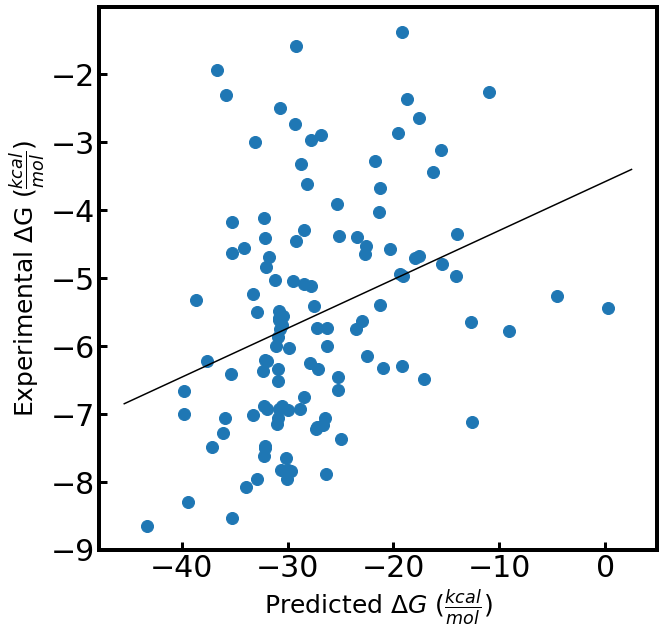

In [14]:
X=bigdata["Conf1 dG"]
Y=bigdata["Exp dG"]

# Scatter plot
plt.scatter(X, Y, s=12**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel(r'Predicted $\Delta G \ (\frac{kcal}{mol})$', fontsize=25)
plt.ylabel(r'Experimental $\Delta$G $(\frac{kcal}{mol})$', fontsize=25)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(which='both',direction='in',length=8, width=3,)
# Save figure
#plt.savefig(graph_filepath, dpi=300, format='png', bbox_inches='tight')
plt.savefig("../figs/corr-c1.png", format='png', transparent=True, bbox_inches='tight')

#rmse_val = rmse(X, Y)
#print("RMSD is: " + str(rmse_val))

In [15]:
X = sm.add_constant(bigdata["Conf2 dG"])
Y = bigdata["Exp dG"]

results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())

regr = linear_model.LinearRegression()
regr.fit(X,Y)
b = regr.intercept_
m = regr.coef_[1]
print('Y-Intercept: ', regr.intercept_)
print('Slope: ', regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                 Exp dG   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.019
Date:                Fri, 03 Feb 2023   Prob (F-statistic):             0.0849
Time:                        11:36:28   Log-Likelihood:                -227.33
No. Observations:                 119   AIC:                             458.7
Df Residuals:                     117   BIC:                             464.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8510      0.429    -11.317      0.0

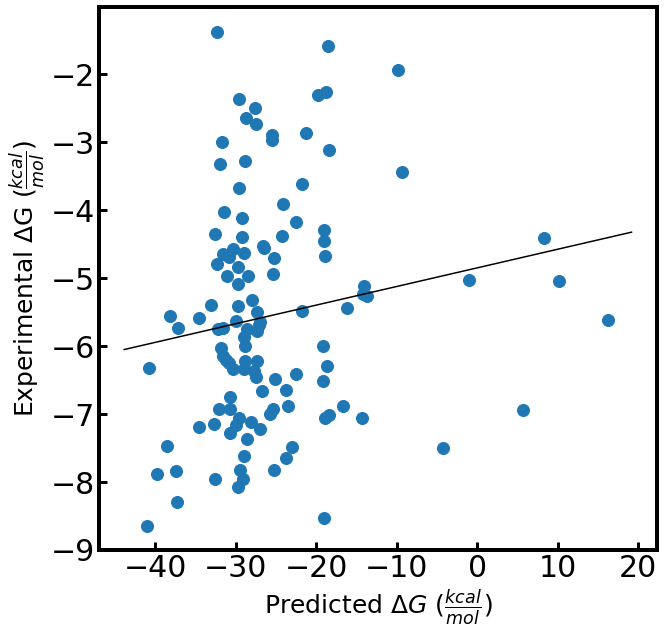

In [16]:
X=bigdata["Conf2 dG"]
Y=bigdata["Exp dG"]

# Scatter plot
plt.scatter(X, Y, s=12**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel(r'Predicted $\Delta G \ (\frac{kcal}{mol})$', fontsize=25)
plt.ylabel(r'Experimental $\Delta$G $(\frac{kcal}{mol})$', fontsize=25)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(which='both',direction='in',length=8, width=3,)
# Save figure
#plt.savefig(graph_filepath, dpi=300, format='png', bbox_inches='tight')
plt.savefig("../figs/corr-c2.png", format='png', transparent=True, bbox_inches='tight')

#rmse_val = rmse(X, Y)
#print("RMSD is: " + str(rmse_val))

In [17]:
bigdata.to_csv(r'pde2inhib.csv')

# Priyanka Data

In [18]:
pdata=pd.read_csv("PDE2-data.csv", header=0, sep=',')
pdata.columns = ["Compound", "IC50", "Rank", "Dock Score", "Exp"]
pdata['Exp dG'] = pdata['IC50'].apply(convertAffinity)

In [19]:
X = sm.add_constant(pdata["Dock Score"])
Y = pdata["Exp dG"]

results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())

regr = linear_model.LinearRegression()
regr.fit(X,Y)
b = regr.intercept_
m = regr.coef_[1]
print('Y-Intercept: ', regr.intercept_)
print('Slope: ', regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                 Exp dG   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     552.1
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           4.40e-50
Time:                        11:36:31   Log-Likelihood:                -158.22
No. Observations:                 140   AIC:                             320.4
Df Residuals:                     138   BIC:                             326.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7005      0.279      2.507      0.0

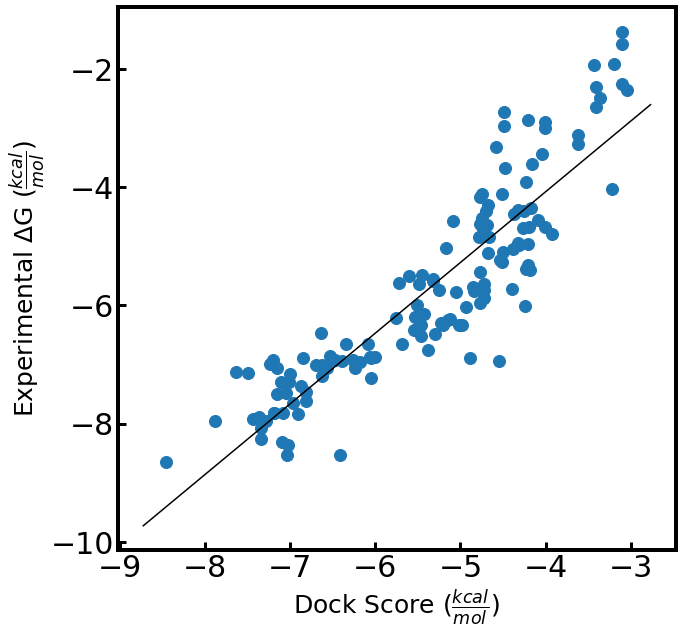

In [20]:
X=pdata["Dock Score"]
Y=pdata["Exp dG"]

# Scatter plot
plt.scatter(X, Y, s=12**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel(r'Dock Score $(\frac{kcal}{mol})$', fontsize=25)
#plt.xlabel(r'Predicted $\Delta G \ (\frac{kcal}{mol})$', fontsize=25)
plt.ylabel(r'Experimental $\Delta$G $(\frac{kcal}{mol})$', fontsize=25)
plt.xticks(fontsize=30)
plt.yticks((np.arange(-2, -11, step=-2)), fontsize=30)
plt.tick_params(which='both',direction='in',length=8, width=3,)
# Save figure
#plt.savefig(graph_filepath, dpi=300, format='png', bbox_inches='tight')
#plt.savefig("../figs/pcorr.png", format='png', transparent=True, bbox_inches='tight')

#rmse_val = rmse(X, Y)
#print("RMSD is: " + str(rmse_val))